# Convergence of inverse iteration

In [1]:
using FundamentalsNumericalComputation

We set up a $5\times 5$ triangular matrix with prescribed eigenvalues on its diagonal.

In [2]:
λ = [1,-0.75,0.6,-0.4,0]
A = triu(ones(5,5),1) + diagm(λ)   # triangular matrix, eigs on diagonal

5×5 Matrix{Float64}:
 1.0   1.0   1.0   1.0  1.0
 0.0  -0.75  1.0   1.0  1.0
 0.0   0.0   0.6   1.0  1.0
 0.0   0.0   0.0  -0.4  1.0
 0.0   0.0   0.0   0.0  0.0

We run inverse iteration with the shift $s=0.7$ and take the final estimate as our "exact" answer to observe the convergence. 

In [3]:
γ,x = FNC.inviter(A,0.7,30)
eigval = γ[end]

0.5999999999999971

As expected, the eigenvalue that was found is the one closest to 0.7. The convergence is again linear.

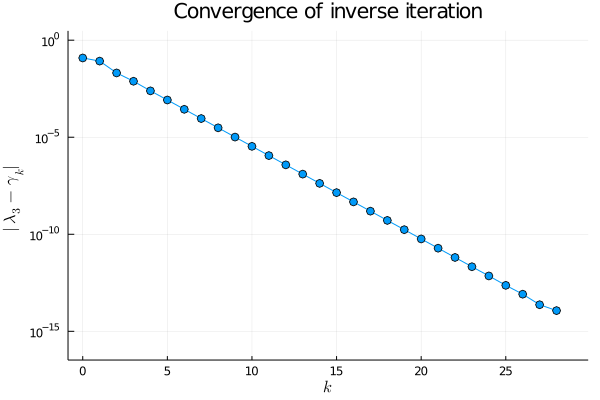

In [4]:
err = @. eigval - γ
plot(0:29,abs.(err),m=:o,label="", 
    title="Convergence of inverse iteration",
    xlabel=L"k",yaxis=(L"|\lambda_3 - \gamma_k|",:log10,[1e-16,1]) )

The observed linear convergence rate is found from the data. 

In [5]:
@show observed_rate = err[22]/err[21];

observed_rate = err[22] / err[21] = -0.33326577137419094


In the numbering of this example, the eigenvalue closest to $s=0.7$ is $\lambda_3$ and the next-closest is $\lambda_1$. Hence the theoretical convergence rate is

In [7]:
@show theoretical_rate = (λ[3]-0.7) / (λ[1]-0.7);

theoretical_rate = (λ[3] - 0.7) / (λ[1] - 0.7) = -0.3333333333333332
